<a href="https://colab.research.google.com/github/NumKate/CSST101-CS3B/blob/main/3B_MACASAET_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CCST 101**

# **Topic 3.2: Advanced Probabilistic Models Markov decision processes**
Exercise 1: Setting Up the Environment

In [ ]:
pip install pgmpy numpy pandas matplotlib

Exercise 2: Building a Simple DBN

In [11]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()
model.add_edges_from([(('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1))])

model.add_cpds(
    TabularCPD(('Rain', 0), 2, [[0.8], [0.2]]),
    TabularCPD(('Sprinkler', 0), 2, [[0.6, 0.2], [0.4, 0.8]], evidence = [('Rain', 0)], evidence_card = [2]),
    TabularCPD(('Rain', 1), 2, [[0.7, 0.3], [0.3, 0.7]], evidence = [('Rain', 0)], evidence_card = [2])
)

Exercise 3: Performing Inference

In [15]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()
model.add_edges_from([(('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1))])

# Define CPDs for all time slices (0 and 1) for all variables
model.add_cpds(
    TabularCPD(('Rain', 0), 2, [[0.8], [0.2]]),
    TabularCPD(('Sprinkler', 0), 2, [[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('Rain', 1), 2, [[0.7, 0.3], [0.3, 0.7]], evidence=[('Rain', 0)], evidence_card=[2]),
    # Add CPD for Sprinkler at time slice 1, assuming it depends on Rain at time slice 1
    TabularCPD(('Sprinkler', 1), 2, [[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 1)], evidence_card=[2])
)

Exercise 4: Visualizing the DBN

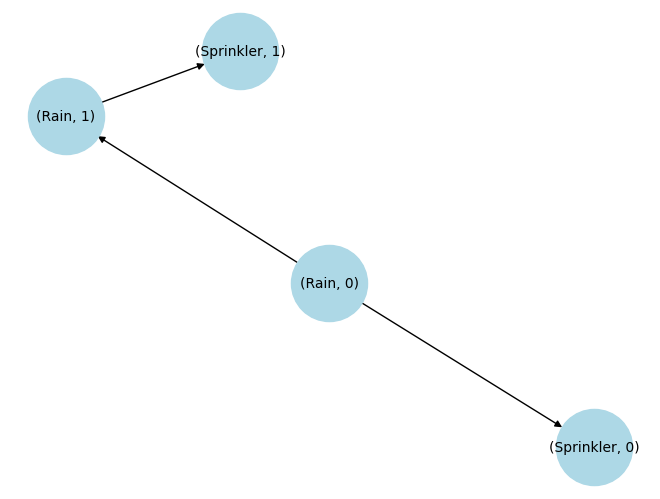

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import DynamicBayesianNetwork as DBN

# Assuming 'model' is your DynamicBayesianNetwork object
# ... (Your code to create and populate 'model') ...


# Create a NetworkX graph directly from the DBN's edges
graph = nx.DiGraph(model.edges())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
plt.show()

Exercise 5: Extending the DBN

Is the model valid? True


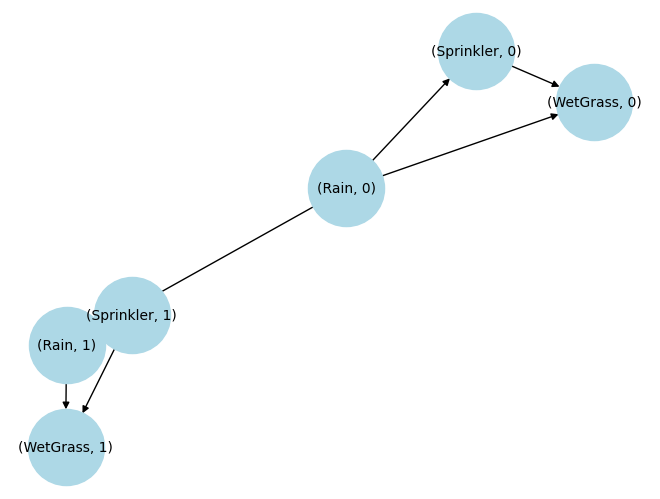

In [20]:
# prompt: Exercise 5: Extending the DBN
# Objective: Modify the DBN to include additional variables, such as WetGrass.
# Instructions:
# 1. Add new nodes and dependencies to the DBN.
# 2. Define the corresponding CPTs and add them to the model.
# 3. Perform inference on the extended DBN and analyze the results.

from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Exercise 5: Extending the DBN
model = DBN()
model.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('WetGrass', 0)), (('Rain', 0), ('WetGrass', 0)),
    (('Rain', 1), ('Sprinkler', 1)), (('Sprinkler', 1), ('WetGrass', 1)), (('Rain', 1), ('WetGrass', 1))
])

# Define CPDs for all time slices (0 and 1) for all variables
model.add_cpds(
    TabularCPD(('Rain', 0), 2, [[0.8], [0.2]]),
    TabularCPD(('Sprinkler', 0), 2, [[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('WetGrass', 0), 2, [[0.9, 0.1, 0.7, 0.3], [0.1, 0.9, 0.3, 0.7]], evidence=[('Sprinkler', 0), ('Rain', 0)], evidence_card=[2, 2]),
    TabularCPD(('Rain', 1), 2, [[0.7, 0.3], [0.3, 0.7]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('Sprinkler', 1), 2, [[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 1)], evidence_card=[2]),
    TabularCPD(('WetGrass', 1), 2, [[0.9, 0.1, 0.7, 0.3], [0.1, 0.9, 0.3, 0.7]], evidence=[('Sprinkler', 1), ('Rain', 1)], evidence_card=[2, 2])
)


# Check model structure and CPDs
print("Is the model valid?", model.check_model())

# Create a NetworkX graph directly from the DBN's edges
graph = nx.DiGraph(model.edges())

# Draw the graph using NetworkX
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
plt.show()